In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
ages = [15, 15, 15, 18, 28, 29, 37, 37, 44, 50, 50, 60, 61, 64, 65, 65, 72, 75, 75, 82, 85, 91, 91, 97, 98, 125, 142, 142, 147, 147, 150, 159, 165, 183, 192, 195, 218, 218, 219, 224, 225, 227, 232, 232, 237, 246, 258, 276, 285, 300, 301, 305, 312, 317, 338, 347, 354, 357, 375, 394, 513, 535, 554, 591, 648, 660, 705, 723, 756, 768, 860]
weights = [21.66, 22.75, 22.3, 31.25, 44.79, 40.55, 50.25, 46.88, 52.03, 63.47, 61.13, 81, 73.09, 79.09, 79.51, 65.31, 71.9, 86.1, 94.6, 92.5, 105, 101.7, 102.9, 110, 104.3, 134.9, 130.68, 140.58, 155.3, 152.2, 144.5, 142.15, 139.81, 153.22, 145.72, 161.1, 174.18, 173.03, 173.54, 178.86, 177.68, 173.73, 159.98, 161.29, 187.07, 176.13, 183.4, 186.26, 189.66, 186.09, 186.7, 186.8, 195.1, 216.41, 203.23, 188.38, 189.7, 195.31, 202.63, 224.82, 203.3, 209.7, 233.9, 234.7, 244.3, 231, 242.4, 230.77, 242.57, 232.12, 246.7]

data = pd.DataFrame.from_dict({"ages": ages, "weights": weights})
data

,ages,weights
0,15,21.66
1,15,22.75
2,15,22.30
3,18,31.25
4,28,44.79
...,...,...
66,705,242.40
67,723,230.77
68,756,242.57
69,768,232.12


In [ ]:
# hyperparameters
intermediate_size = 65
epochs = 450
batch_size = 4
lr = 3e-3

In [ ]:
import tensorflow as tf

inputs = tf.constant(data["ages"], dtype=tf.float32)[:, None]
targets = tf.constant(data["weights"], dtype=tf.float32)

model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(intermediate_size, input_dim=1, activation="tanh"),
        tf.keras.layers.Dense(1, activation='linear'),
])

optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
model.compile(loss='mean_squared_error', optimizer=optimizer)
history = model.fit(inputs, targets, epochs=epochs, batch_size=batch_size)

Epoch 1/450
18/18 [==============================] - 0s 1ms/step - loss: 24921.1895
Epoch 2/450
18/18 [==============================] - 0s 2ms/step - loss: 23589.0527
Epoch 3/450
18/18 [==============================] - 0s 1ms/step - loss: 22584.4980
Epoch 4/450
18/18 [==============================] - 0s 2ms/step - loss: 21626.7090
Epoch 5/450
18/18 [==============================] - 0s 2ms/step - loss: 20744.6094
Epoch 6/450
18/18 [==============================] - 0s 1ms/step - loss: 19912.6094
Epoch 7/450
18/18 [==============================] - 0s 2ms/step - loss: 19111.1855
Epoch 8/450
18/18 [==============================] - 0s 2ms/step - loss: 18348.4922
Epoch 9/450
18/18 [==============================] - 0s 1ms/step - loss: 17589.0977
Epoch 10/450
18/18 [==============================] - 0s 1ms/step - loss: 16886.6777
Epoch 11/450
18/18 [==============================] - 0s 2ms/step - loss: 16205.1123
Epoch 12/450
18/18 [==============================] - 0s 2ms/step - loss: 

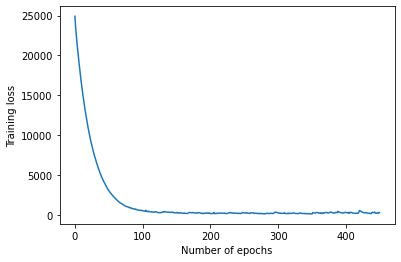

In [ ]:
training_loss = history.history["loss"]
plt.plot(np.arange(len(training_loss)), training_loss)
plt.ylabel("Training loss")
plt.xlabel("Number of epochs")
plt.show()

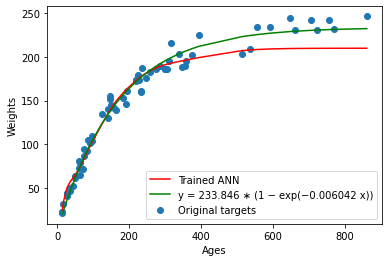

In [ ]:
predictions = model.predict(inputs)
plt.scatter(data["ages"], data["weights"], label="Original targets")
plt.plot(data["ages"], predictions, color="r", label="Trained ANN")

y = lambda x: 233.846*(1 - np.exp(-0.006042*x))
plt.plot(data["ages"], y(data["ages"]), color="g", label="y = 233.846 ∗ (1 − exp(−0.006042 x))")

plt.xlabel("Ages")
plt.ylabel("Weights")
plt.legend()
plt.show()